In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Saving toronjas.png to toronjas.png


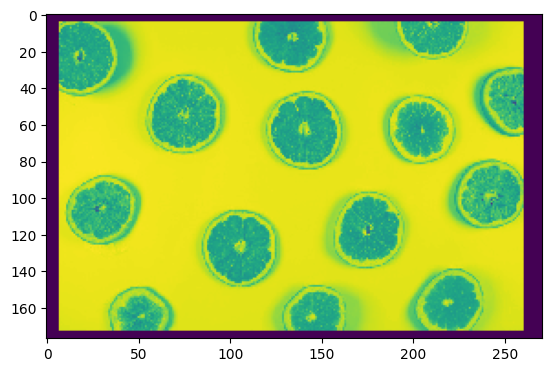

In [3]:
uploaded = files.upload()
file_name = next(iter(uploaded))
img_array = np.frombuffer(uploaded[file_name], np.uint8)
gray = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray)

In [4]:
# Step 2: Calculate original histogram
original_hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

In [5]:
# Step 3: Global histogram equalization
equalized = cv2.equalizeHist(gray)
equalized_hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])

In [6]:
# Step 4: CLAHE (Adaptive Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray)
clahe_hist = cv2.calcHist([clahe_img], [0], None, [256], [0, 256])

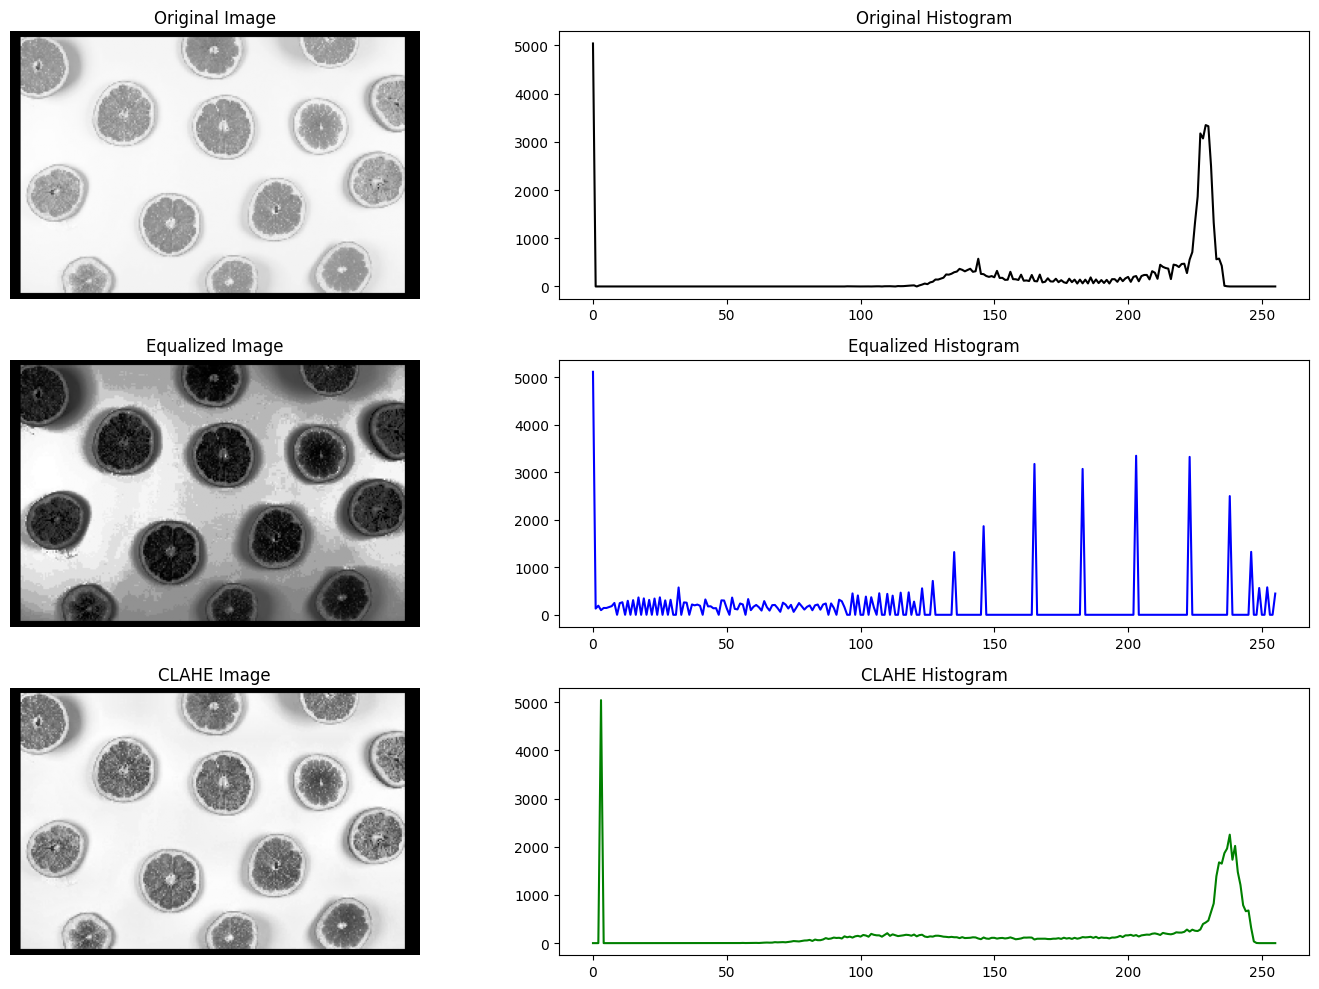

In [8]:
# Step 5: Plot all images and histograms
plt.figure(figsize=(15, 10))

# Original image and histogram
plt.subplot(3, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.plot(original_hist, color='black')
plt.title("Original Histogram")

# Equalized image and histogram
plt.subplot(3, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.plot(equalized_hist, color='blue')
plt.title("Equalized Histogram")

# CLAHE image and histogram
plt.subplot(3, 2, 5)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Image")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.plot(clahe_hist, color='green')
plt.title("CLAHE Histogram")

plt.tight_layout()
plt.show()